# BCI Project: Classifying hvEEGNet encoded data with Logistic Regression and SVM

## By BrainRot: Lotte Michels & Selma Ancel

This notebook was used to train Logistic Regression and SVM models on the OpenMIIR data encoded by the hvEEGNet encoder. Please refer to our project submission for a textual description of the training steps. The notebook and comments in the code will also provide an outline of the steps that are performed. Models from the sklearn package are used. For the SVM, the setup by Stober (2017) is followed.

### References:
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.
- Stober, S. (2017). Toward Studying Music Cognition with Information Retrieval Techniques: Lessons Learned from the OpenMIIR Initiative. Frontiers in Psychology, 8. https://doi.org/10.3389/fpsyg.2017.01255. Related code is published here: https://github.com/sstober/openmiir.

## Condition 1 (Perception)


### Logistic Regression

In [3]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c1_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c1_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)


(540, 16, 1, 45) (540,)
(540, 720) (540,)


In [4]:
# Build Logistic Regression model using nested cross-validation

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Run Grid Search (inner loop)
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y)

# Print Grid Search results
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("LogRes on condition 1: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

# Evaluate (outer loop)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
print(scores)
print("LogRes on condition 1: final accuracy evaluation:", scores.mean())

LogRes on condition 1: best grid search/cross-validation accuracy score was: 0.08518518518518518 achieved by the solver: saga and a regularization parameter C of: 0.1
[0.05555556 0.08333333 0.09259259 0.10185185 0.09259259]
LogRes on condition 1: final accuracy evaluation: 0.08518518518518518


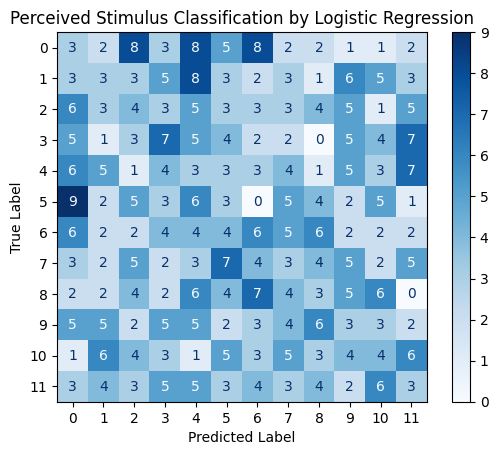

In [5]:
# Plot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = cross_val_predict(best_model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Perceived Stimulus Classification by Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Support Vector Machine (SVM) 

Following Stober (2017):
* The SVC function from 'sklearn.svm' is used
* The kernel parameter is set to 'linear'
* The following values for the regularization hyperparameter (C) are tested: [0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]


In [6]:
# Find optimal SVM model

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Run Grid Search
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y)

# Print results
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

# Evaluate (outer loop)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
print(scores)
print("SVM on condition 1: final accuracy evaluation:", scores.mean())

SVM on condition 1: best grid search/cross-validation accuracy score was: 0.08518518518518518 achieved by a regularization parameter C of: 0.001
[0.0462963  0.09259259 0.06481481 0.09259259 0.12962963]
SVM on condition 1: final accuracy evaluation: 0.08518518518518518


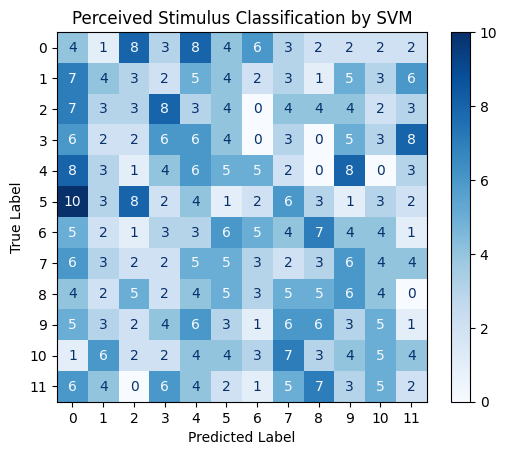

In [7]:
# Plot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = cross_val_predict(best_model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Perceived Stimulus Classification by SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Condition 2 (Imagination)

### Logistic Regression

In [8]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c2_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c2_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)


(540, 16, 1, 45) (540,)
(540, 720) (540,)


In [9]:
# Find optimal Logistic Regression model

from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Run Grid Search
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y)

# Print results
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("LogRes on condition 2: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

# Evaluate (outer loop)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
print(scores)
print("LogRes on condition 2: final accuracy evaluation:", scores.mean())

LogRes on condition 2: best grid search/cross-validation accuracy score was: 0.09444444444444444 achieved by the solver: sag and a regularization parameter C of: 0.01
[0.10185185 0.11111111 0.06481481 0.13888889 0.05555556]
LogRes on condition 2: final accuracy evaluation: 0.09444444444444444


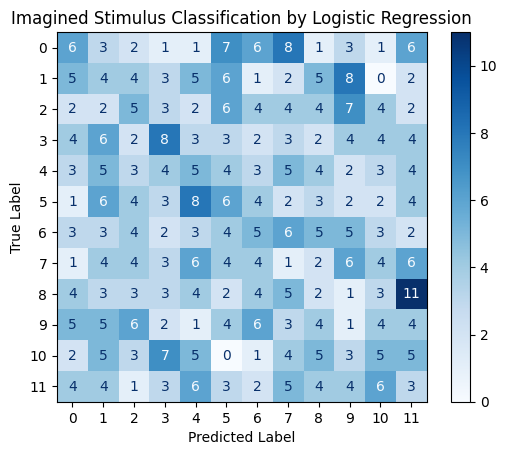

In [10]:
# Plot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = cross_val_predict(best_model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Imagined Stimulus Classification by Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Support Vector Machine (SVM) 

Following Stober (2017): 
* The SVC function from 'sklearn.svm' is used
* The kernel parameter is set to 'linear'
* The following values for the regularization hyperparameter (C) are tested: [0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]

In [11]:
# Find optimal SVM model

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Run Grid Search
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y)

# Print results
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("SVM on condition 2: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

# Evaluate (outer loop)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
print(scores)
print("SVM on condition 2: final accuracy evaluation:", scores.mean())

SVM on condition 2: best grid search/cross-validation accuracy score was: 0.07962962962962963 achieved by a regularization parameter C of: 0.01
[0.09259259 0.08333333 0.07407407 0.10185185 0.0462963 ]
SVM on condition 2: final accuracy evaluation: 0.07962962962962963


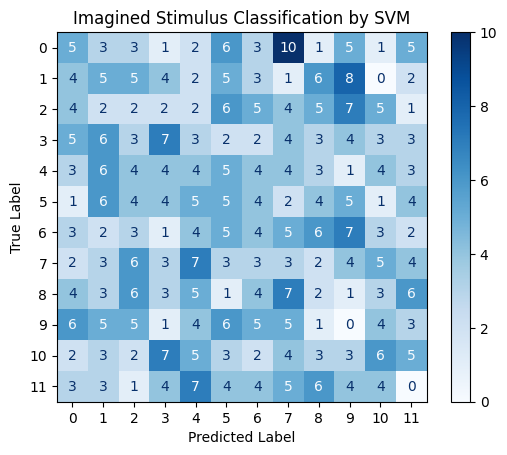

In [12]:
# Plot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = cross_val_predict(best_model, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Imagined Stimulus Classification by SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classifying on Song Group and Song Meter instead of Stimulus

In [13]:
group_dict = {0:1,1:1, 2:1, 3:1, 
             4:2, 5:2, 6:2, 7:2,
             8:3, 9:3, 10:3, 11:3} # nr = group. There are three groups/classes

meter_dict = {0:1, 1:1, 4:1, 5:1, 8:1, 9:1,
             2:2, 3:2, 6:2, 7:2, 10:2, 11:2} # 1 = 3/4 meter, 2 = 4/4 meter. There are two meters/classes

## Condition 1 (Perception)

In [14]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c1_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c1_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)

(540, 16, 1, 45) (540,)
(540, 720) (540,)


Group-LogRes on condition 1: best grid search/cross-validation accuracy score was: 0.34629629629629627 achieved by the solver: lbfgs and a regularization parameter C of: 0.3
Group-LogRes final evaluation on condition 1: 0.34629629629629627


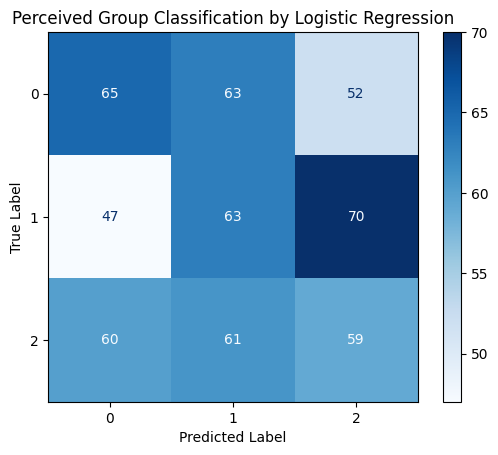

Group-SVM on condition 1: best grid search/cross-validation accuracy score was: 0.337037037037037 achieved by a regularization parameter C of: 0.001
Group-SVM final evaluation on condition 1: 0.337037037037037


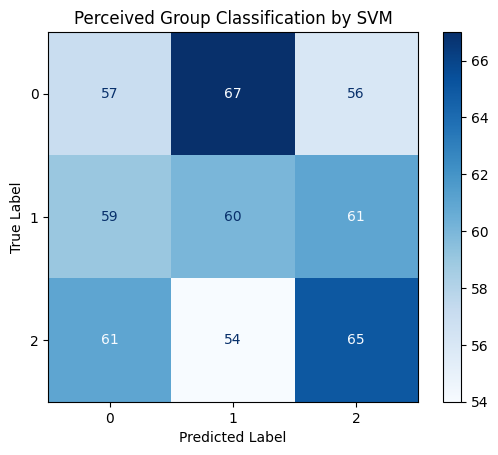

In [15]:
# Group classification

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Map y and train/test split
y_group = np.array([group_dict[n] for n in y])
#print(y_group)

# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y_group)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Group-LogRes on condition 1: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_group, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Group-LogRes final evaluation on condition 1:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_group, cv=5)
cm = confusion_matrix(y_group, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Perceived Group Classification by Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X, y_group)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Group-SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_group, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Group-SVM final evaluation on condition 1:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_group, cv=5)
cm = confusion_matrix(y_group, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Perceived Group Classification by SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Meter-LogRes on condition 1: best grid search/cross-validation accuracy score was: 0.4851851851851851 achieved by the solver: lbfgs and a regularization parameter C of: 0.001
Meter-LogRes final evaluation on condition 1: 0.4851851851851851


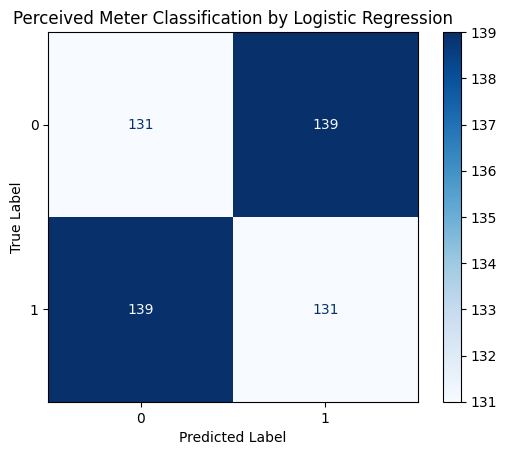

Meter-SVM on condition 1: best grid search/cross-validation accuracy score was: 0.5037037037037038 achieved by a regularization parameter C of: 0.0001
Meter-SVM final evaluation on condition 1: 0.5037037037037038


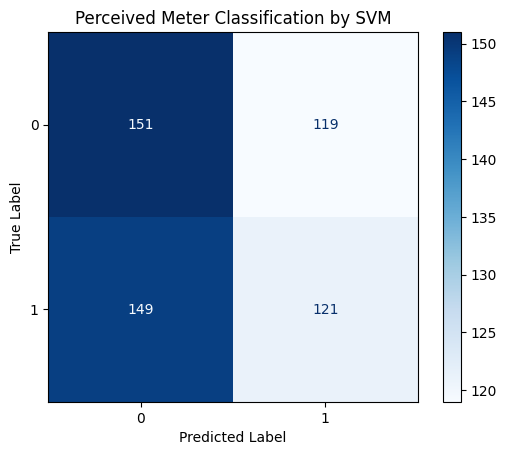

In [16]:
# Meter classification

# Map y and train/test split
y_meter = np.array([meter_dict[n] for n in y])
#print(y_meter)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y_meter)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Meter-LogRes on condition 1: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_meter, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Meter-LogRes final evaluation on condition 1:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_meter, cv=5)
cm = confusion_matrix(y_meter, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Perceived Meter Classification by Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X, y_meter)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Meter-SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_meter, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Meter-SVM final evaluation on condition 1:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_meter, cv=5)
cm = confusion_matrix(y_meter, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Perceived Meter Classification by SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Condition 2 (Imagination)

In [17]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c2_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c2_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)

(540, 16, 1, 45) (540,)
(540, 720) (540,)


Group-LogRes on condition 2: best grid search/cross-validation accuracy score was: 0.32592592592592595 achieved by the solver: saga and a regularization parameter C of: 0.5
Group-LogRes final evaluation on condition 2: 0.32037037037037036


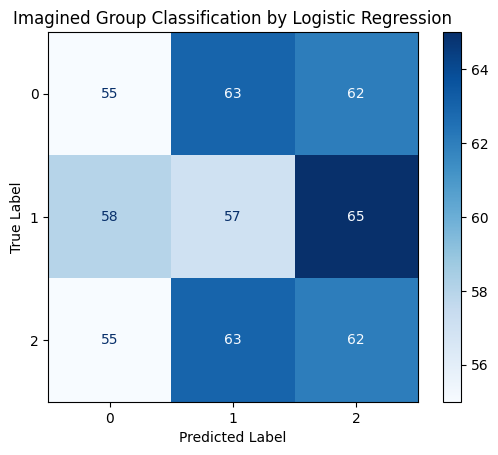

Group-SVM on condition 2: best grid search/cross-validation accuracy score was: 0.3333333333333333 achieved by a regularization parameter C of: 0.0005
Group-SVM final evaluation on condition 2: 0.3333333333333333


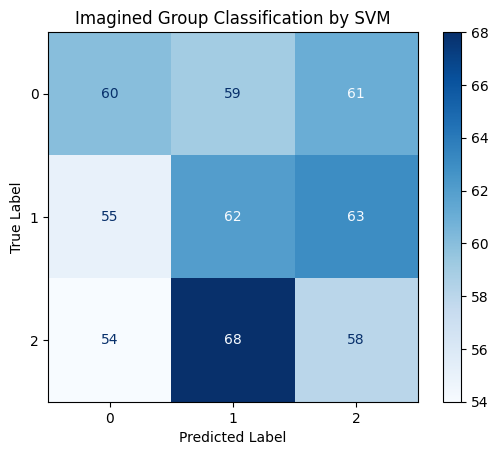

In [18]:
# Group classification

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Map y and train/test split
y_group = np.array([group_dict[n] for n in y])
#print(y_group)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y_group)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Group-LogRes on condition 2: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_group, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Group-LogRes final evaluation on condition 2:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_group, cv=5)
cm = confusion_matrix(y_group, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Imagined Group Classification by Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X, y_group)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Group-SVM on condition 2: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_group, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Group-SVM final evaluation on condition 2:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_group, cv=5)
cm = confusion_matrix(y_group, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Imagined Group Classification by SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Meter-LogRes on condition 2: best grid search/cross-validation accuracy score was: 0.4962962962962963 achieved by the solver: lbfgs and a regularization parameter C of: 0.01
Meter-LogRes final evaluation on condition 2: 0.4962962962962963


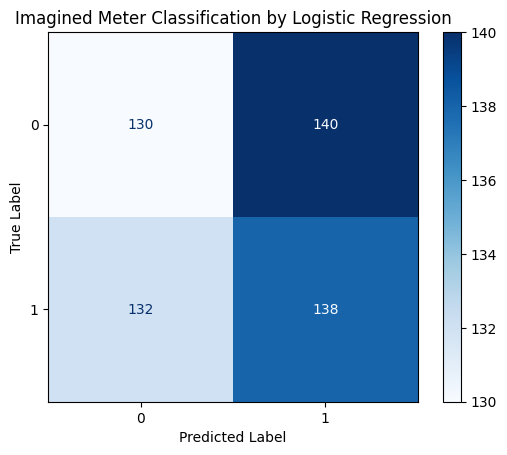

Meter-SVM on condition 2: best grid search/cross-validation accuracy score was: 0.49074074074074076 achieved by a regularization parameter C of: 0.005
Meter-SVM final evaluation on condition 2: 0.49074074074074076


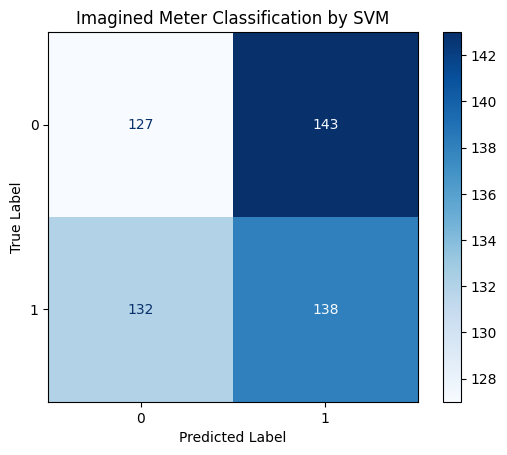

In [19]:
# Meter classification

# Map y and train/test split
y_meter = np.array([meter_dict[n] for n in y])
#print(y_meter)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X, y_meter)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Meter-LogRes on condition 2: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_meter, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Meter-LogRes final evaluation on condition 2:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_meter, cv=5)
cm = confusion_matrix(y_meter, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Imagined Meter Classification by Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X, y_meter)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Meter-SVM on condition 2: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, y_meter, cv=5, scoring='accuracy') # create 5 different stratified 80-20 splits
#print(scores)
print("Meter-SVM final evaluation on condition 2:", scores.mean())

# Plot
y_pred = cross_val_predict(best_model, X, y_meter, cv=5)
cm = confusion_matrix(y_meter, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Imagined Meter Classification by SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

